<H2><b>STATISTICAL ANALYSIS OF FINANCIAL DATA </H2></b>
<H4><b>Inspired by a WBL Course Taught at the Zurich University of Applied Sciences by Dr Marcel Dettling</H4>
<p></b>
----------------------------------------------------------------------------------------------------------------
<H5><i>Run this notebook in a jupyter environment, when prompted to- select a stock for analysis by entering it's ticker symbol and the notebook will analyse it for you</H5></i>
<hr size="8" noshade>

In [63]:
# Importing libraries

import pandas as pd
import numpy as np
import pandas_datareader as pdr
from pandas_datareader import data as web
import yfinance as yf
from pandas import Series, DataFrame
import datetime as dt
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<h3><b> Step 1 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Extracting Data</h4>



In [2]:
stock = input("Enter the ticker symbol of the stock you want analysed: ")
print(stock)

AAPL


In [3]:
start = dt.datetime(2022,1,1)
end =dt.datetime.today()
print(start)
print(end)

2022-01-01 00:00:00
2023-08-12 14:50:28.036463


In [4]:

from yahoofinancials import YahooFinancials

my_data = yf.download(stock, start=start, end=end, progress=False)
#df= web.DataReader(stock, 'yahoo', start, end)
df=pd.DataFrame(my_data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100


<h3><b> Step 2 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Pre-Processing</h4>


In [5]:
df.shape

(404, 6)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,404.000000,404.000000,404.000000,404.000000,404.000000,4.040000e+02
mean,159.058317,160.996361,157.278366,159.201658,158.366876,7.789531e+07
std,16.432330,16.188274,16.611925,16.375867,16.416619,2.534245e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,146.730000,148.540005,144.744999,146.690006,145.992420,5.907488e+07
50%,158.825005,160.464996,155.590004,157.739998,156.999535,7.450945e+07
75%,171.205002,173.095001,170.070004,171.832500,170.469116,9.019152e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.826020e+08


In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.corr

<bound method DataFrame.corr of                   Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.190964  \
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.904053   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.171844   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.281006   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.449310   
...                ...         ...         ...         ...         ...   
2023-08-07  182.130005  183.130005  177.350006  178.850006  178.608810   
2023-08-08  179.690002  180.270004  177.580002  179.800003  179.557526   
2023-08-09  180.869995  180.929993  177.009995  178.190002  177.949707   
2023-08-10  179.479996  180.750000  177.600006  177.970001  177.729996   
2023-08-11  177.320007  178.619995  176.550003  177.789993  177.789993   

     

<h3><b> Step 3 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Creating Visualisations</h4>


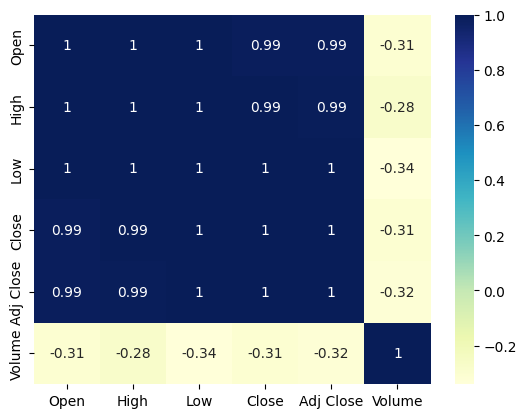

In [10]:
corr=df.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

<Axes: >

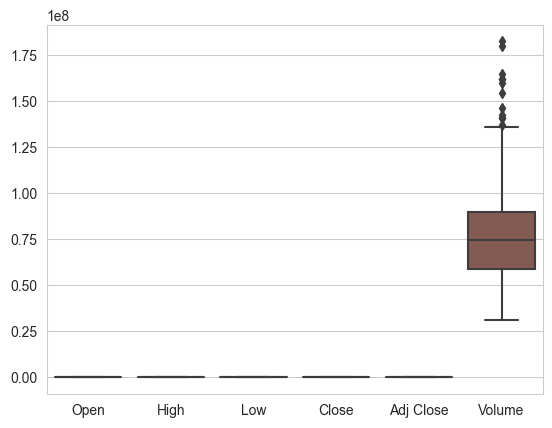

In [11]:
sns.set_style("whitegrid")
  
sns.boxplot( data = df)

<Figure size 2400x1200 with 0 Axes>

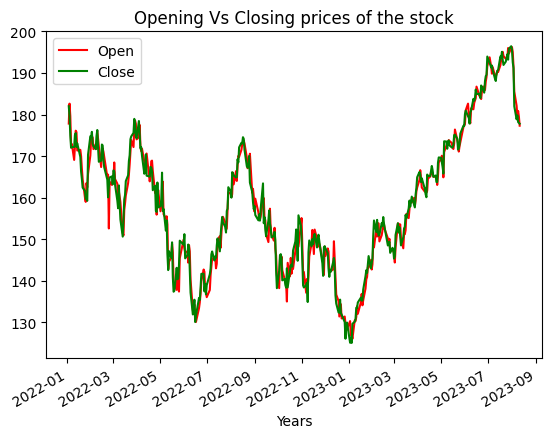

In [12]:
plt.style.use('default')
plt.figure(figsize=(16, 8), dpi=150)
viz=df[["Open","Close"]]
viz.plot(label='Stock', color=['Red', 'green'])
plt.title('Opening Vs Closing prices of the stock')
  
# adding label to x-axis
plt.xlabel('Years')
  
# adding legend.
plt.legend()

In [13]:
df.Close

Date
2022-01-03    182.009995
2022-01-04    179.699997
2022-01-05    174.919998
2022-01-06    172.000000
2022-01-07    172.169998
                 ...    
2023-08-07    178.850006
2023-08-08    179.800003
2023-08-09    178.190002
2023-08-10    177.970001
2023-08-11    177.789993
Name: Close, Length: 404, dtype: float64

In [14]:

df.index = pd.to_datetime(df.index)

# Filter the DataFrame for March 2020
march_2022_df = df[(df.index.year == 2022) & (df.index.month == 3)]


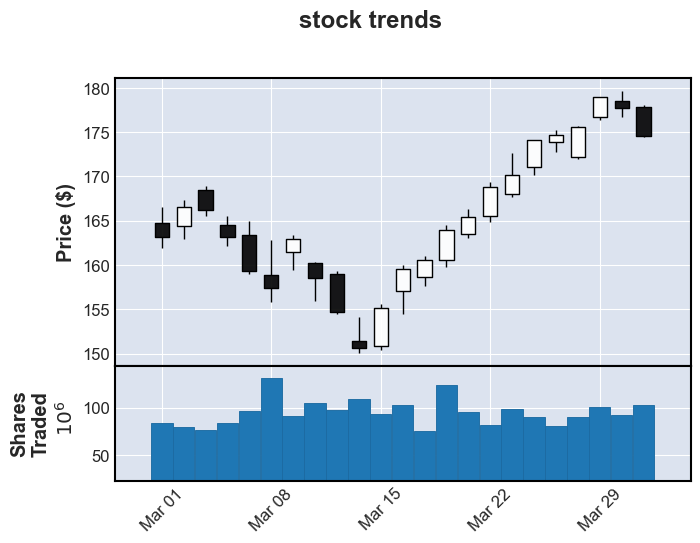

In [18]:
import mplfinance as fplt
fplt.plot(
            march_2022_df,
            type='candle',
            title='stock trends',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',

        )

In [19]:
import plotly
print("plotly Version : {}".format(plotly.__version__))

plotly Version : 5.15.0


In [25]:
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close']
                            )

fig = go.Figure(data=[candlestick])

from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter


<h3><b> Step 4 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Statistical Analysis</h4>


In [49]:
# Descriptive analysis of Log Returns

df['retlog']=np.log(df['Close'].astype('float64')/df['Close'].astype('float64').shift(1))
df.head()


,Open,High,Low,Close,Adj Close,Volume,retlog
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,-0.012773
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600,-0.026960
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000,-0.016834
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100,0.000988


In [50]:
#filling na values

df['retlog'] = df['retlog'].fillna(method = 'bfill')
df.head()

,Open,High,Low,Close,Adj Close,Volume,retlog
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900,-0.012773
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,-0.012773
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600,-0.026960
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000,-0.016834
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100,0.000988


In [56]:
import scipy.stats as scs

# Obtaining range of the plot
plot_range = np.linspace(min(df['retlog']), max(df['retlog']), num=5000 )

# Obtaining the mean
mean = df['retlog'].mean()

# Obtaining the standard deviation
standard_dev = df['retlog'].std()

# Obtaining the probability distribution function of the log returns series
pdf_series = scs.norm.pdf(plot_range, loc=mean, scale=standard_dev)

# Printing mu and sigma
print((mean, standard_dev))

(-8.968164185875317e-05, 0.01953481006787123)


C:\Users\HP\AppData\Local\Temp\ipykernel_1784\573337467.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Q-Q plot')

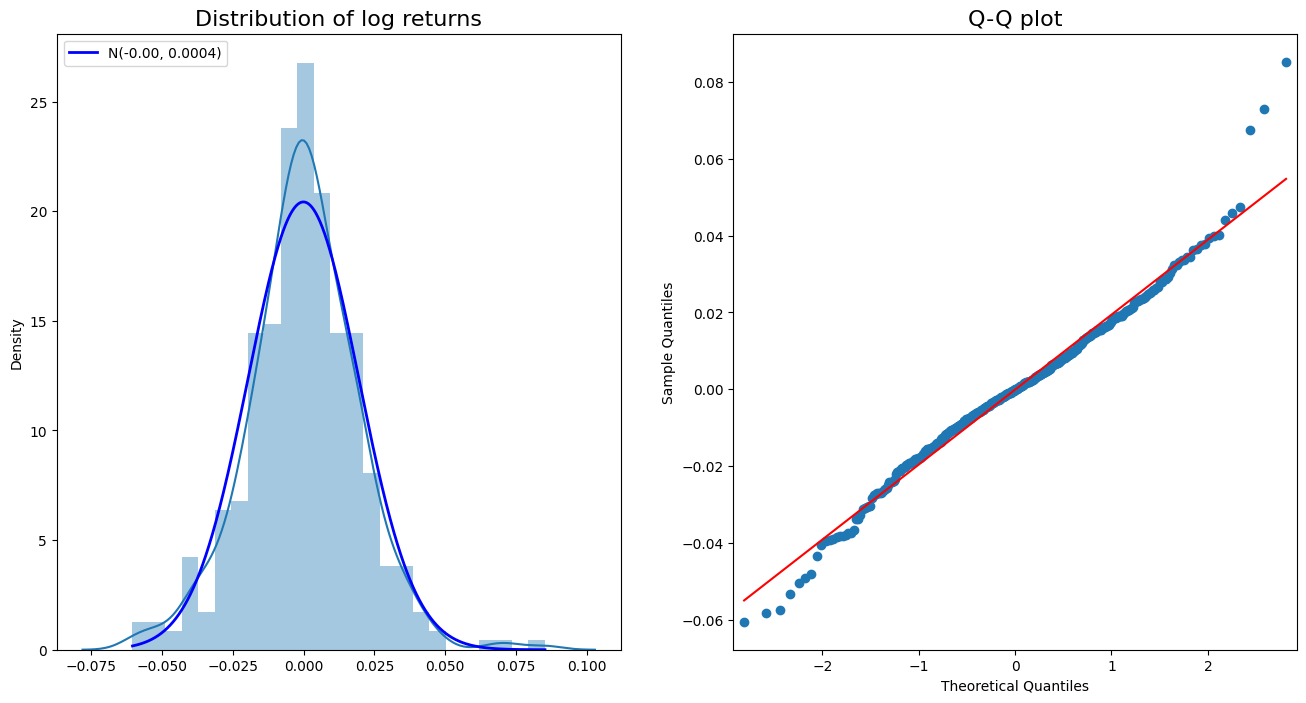

In [58]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.distplot(df['retlog'].values, kde=True, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of log returns', fontsize=16)
ax[0].plot(plot_range, pdf_series, 'b', lw=2,
 label=f'N({mean:.2f}, {standard_dev**2:.4f})')
ax[0].legend(loc='upper left')

# Subplot 2
# Obtaining Q-Q plot using qqplot function of statsmodels.api library
qq = sm.qqplot(df['retlog'].values, line='s', ax=ax[1])
#setting title and fontsize of the second plot
ax[1].set_title('Q-Q plot', fontsize = 16)

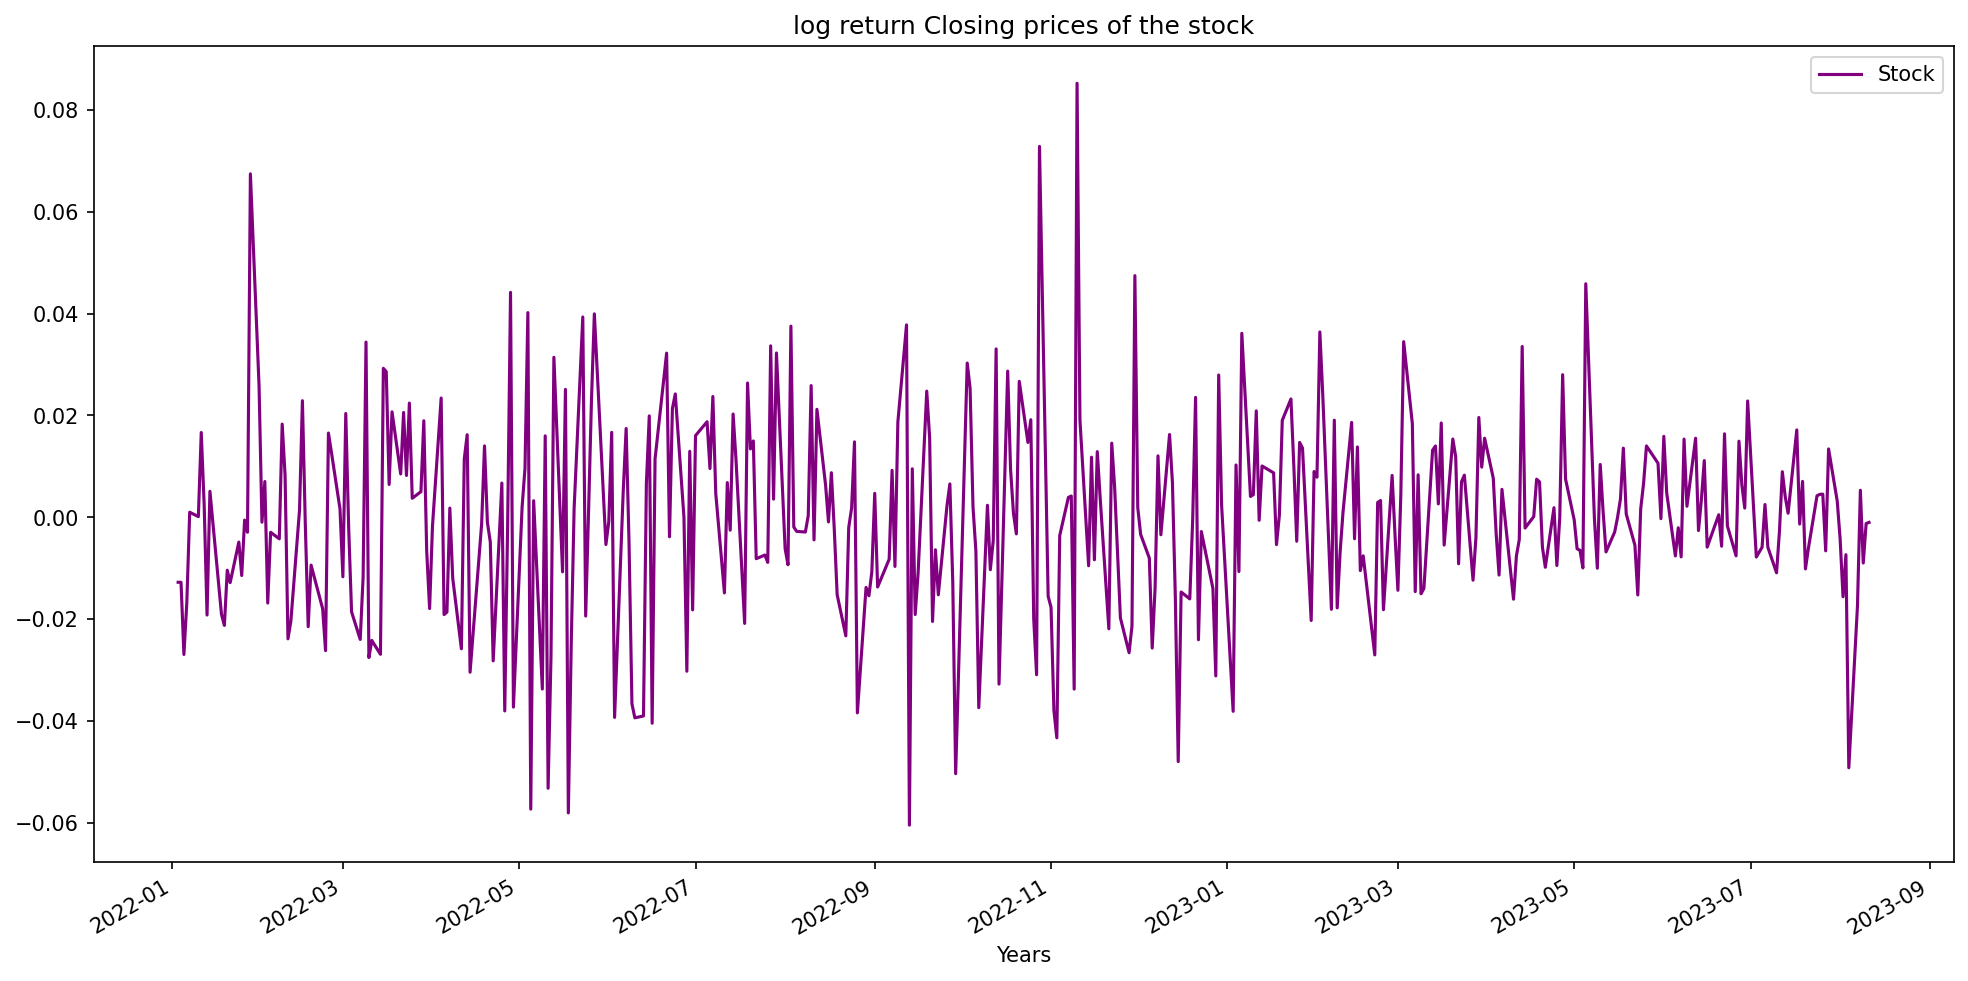

In [51]:
plt.style.use('default')
plt.figure(figsize=(16, 8), dpi=150)
viz=df["retlog"]
viz.plot(label='Stock', color=['purple'])
plt.title('log return Closing prices of the stock')
  
# adding label to x-axis
plt.xlabel('Years')
  
# adding legend.
plt.legend()

The Autocorrelation plot for the data is:


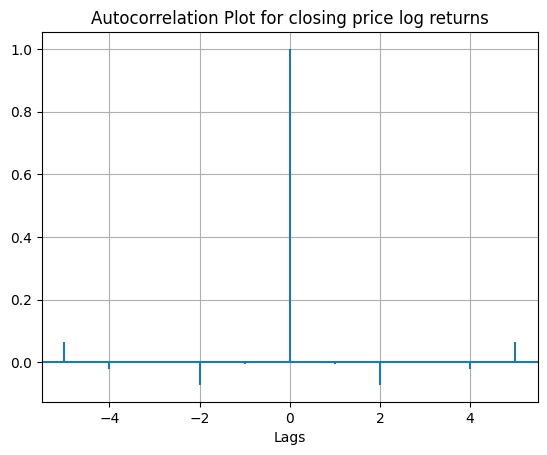

In [53]:
# more plots for better analysis of log returns for closing prices

plt.title("Autocorrelation Plot for closing price log returns")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(df['retlog'], maxlags = 5)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

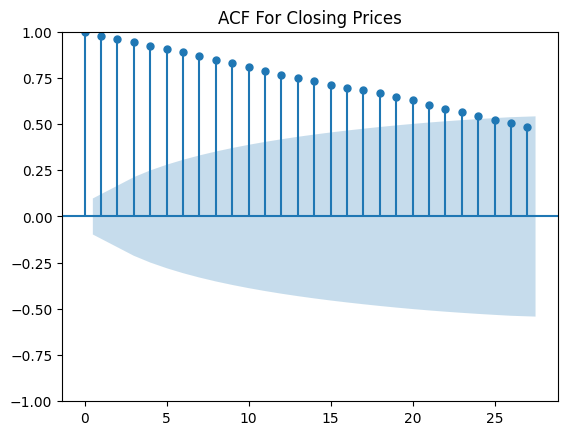

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Close"])
plt.title("ACF For Closing Prices")
plt.show()

The Autocorrelation plot for the data is:


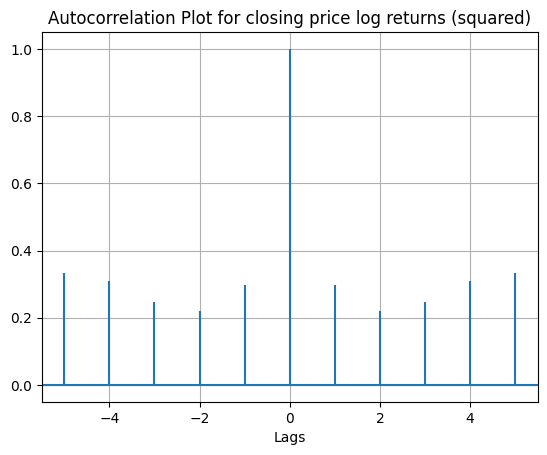

In [55]:
plt.title("Autocorrelation Plot for closing price log returns (squared)")
 
# Providing x-axis name.
plt.xlabel("Lags")

log_ret_square=np.square(df["retlog"])
 
# Plotting the Autocorrelation plot.
plt.acorr(log_ret_square, maxlags = 5)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

In [62]:
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(df["retlog"]))
print(kurtosis(df["retlog"]))

0.12052685580967491
1.515573647019389


In [65]:
# jarque-Bera Test

res = stats.jarque_bera(df["retlog"])
res.statistic

39.64368458565612

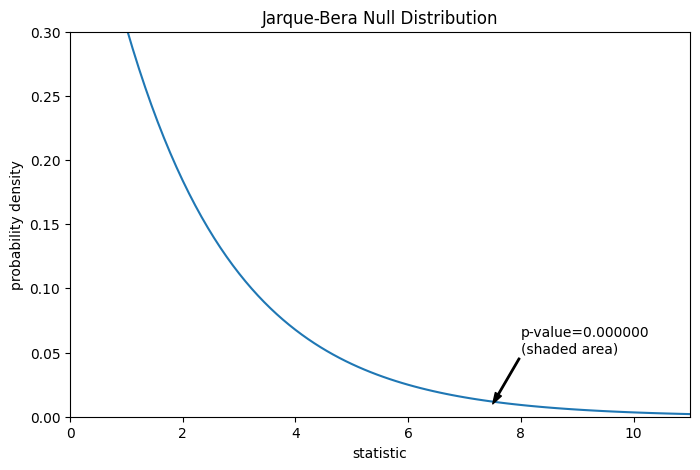

In [68]:
dist = stats.chi2(df=2)
jb_val = np.linspace(0, 11, 100)
pdf = dist.pdf(jb_val)
fig, ax = plt.subplots(figsize=(8, 5))
def jb_plot(ax):  # we'll re-use this
    ax.plot(jb_val, pdf)
    ax.set_title("Jarque-Bera Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")

jb_plot(ax)
pvalue = dist.sf(res.statistic)
annotation = (f'p-value={pvalue:.6f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (7.5, 0.01), (8, 0.05), arrowprops=props)
i = jb_val >= res.statistic  # indices of more extreme statistic values
ax.fill_between(jb_val[i], y1=0, y2=pdf[i])
ax.set_xlim(0, 11)
ax.set_ylim(0, 0.3)
plt.show()